In [12]:
import pandas as pd
import nltk
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('toi_2010_18.csv')

In [25]:
data

,DATE,AUTHOR,IMAGE,TEXT,KEYWORDS,SUMMARY
0,8-1-2010,[],https://static.toiimg.com/photo/msid-5423538/5...,"Junali Devi, a widow living in Assam, is eager...","['hivaids', 'hiv', 'website', 'positive', 'spe...","Junali Devi, a widow living in Assam, is eager..."
1,11-1-2010,['Karthika Gopalakrishnan'],https://static.toiimg.com/photo/msid-47529300/...,CHENNAI: Researchers working towards a cure fo...,"['hiv', 'schooley', 'hopeful', 'research', 're...",These cells have a second molecule called CCR5...
2,12-1-2010,[],https://static.toiimg.com/photo/msid-47529300/...,LUCKNOW: After running from the pillar to post...,"['hiv', 'ngos', 'money', 'shelter', 'poonam', ...",The hapless woman was thrown out by her husban...
3,30-1-2010,[],https://static.toiimg.com/photo/msid-47529300/...,"BANGALORE: Nutrition, education and property r...","['hivaids', 'hiv', 'positive', 'aids', 'childr...","BANGALORE: Nutrition, education and property r..."
4,1-2-2010,['Kounteya Sinha'],https://static.toiimg.com/photo/msid-47529300/...,NEW DELHI: A vaccine to protect HIV patients f...,"['hiv', 'mv', 'aids', 'tb', 'hivinfected', 'pa...",NEW DELHI: A vaccine to protect HIV patients f...
5,2-2-2010,['Sanjeev Kumar Verma'],https://static.toiimg.com/photo/msid-47529300/...,PATNA: With two new anti-retroviral therapy (A...,"['hiv', 'medical', 'patients', 'link', 'therap...",PATNA: With two new anti-retroviral therapy (A...
6,6-2-2010,['Sanjeev Kumar Verma'],https://static.toiimg.com/photo/msid-47529300/...,PATNA: With two new anti-retroviral therapy (A...,"['hiv', 'medical', 'patients', 'link', 'therap...",PATNA: With two new anti-retroviral therapy (A...
7,7-2-2010,[],https://static.toiimg.com/photo/msid-47529300/...,Two new HIV+ cases reported from district jail...,"['hiv', 'positive', 'jail', 'prisons', 'varana...",Two new HIV+ cases reported from district jail...
8,11-2-2010,[],https://static.toiimg.com/photo/msid-47529300/...,ALLAHABAD: Ostracised by society and abandoned...,"['commits', 'village', 'hiv', 'youths', 'young...",ALLAHABAD: Ostracised by society and abandoned...
9,14-2-2010,['Ashish Tripathi'],https://static.toiimg.com/photo/msid-47529300/...,"LUCKNOW: When it comes to ‘extortion’, the Luc...","['hiv', 'rajesh', 'money', 'local', 'petrol', ...","LUCKNOW: When it comes to ‘extortion’, the Luc..."


In [5]:
text = data['TEXT']
date = data['DATE']

In [26]:
year = np.zeros((len(data)))
for i in range(len(data)):
    if 0<=i<=101:
        year[i]=2010
    elif 101<i<= 247:
        year[i]=2011
    elif 247<i<=438:
        year[i]=2012
    elif 438<i<=596:
        year[i]=2013
    elif 596<i<=760:
        year[i]=2014
    elif 760<i<=894:
        year[i]=2015
    elif 894<i<=1027:
        year[i]=2016
    elif 1027<i<=1120:
        year[i]=2017
    else:
        year[i]=2018

In [27]:
data['YEAR']=year

In [28]:
corpus = ''

for i in range(len(text)):
    corpus += text[i]

In [29]:
topics = ['HIV', 'aids', 'drug', 'research', 'scientist','dead','death', 'man', 'woman', 'child', 'medicine', 'he', 'she', 'sex',  'education']

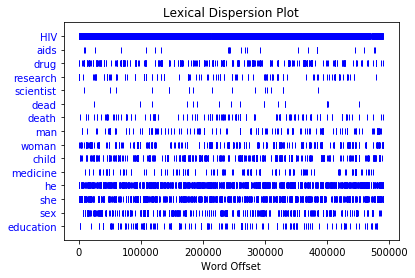

In [30]:
tokens = nltk.word_tokenize(corpus)   # tokenize it
mytext = nltk.Text(tokens)         # turn text into a NLTK Text object

# from Ch. 1
mytext.dispersion_plot(topics)

# Topic Modeling Latent Semantic Analysis (LSA)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(text)

X.shape # check shape of the document-term matrix

(1228, 1000)

In [32]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=9, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

9

In [33]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

Topic 0: 
patients
 
children
 
hospital
 
blood
 
art
 
state
 
treatment
 
Topic 1: 
hospital
 
police
 
woman
 
husband
 
blood
 
children
 
court
 
Topic 2: 
children
 
school
 
students
 
parents
 
education
 
home
 
child
 
Topic 3: 
blood
 
transfusion
 
virus
 
banks
 
sex
 
test
 
infected
 
Topic 4: 
cells
 
virus
 
children
 
researchers
 
school
 
vaccine
 
scientists
 
Topic 5: 
children
 
blood
 
art
 
centres
 
transfusion
 
state
 
centre
 
Topic 6: 
women
 
child
 
pregnant
 
test
 
mother
 
transmission
 
mothers
 
Topic 7: 
hospital
 
dr
 
patient
 
medical
 
doctors
 
surgery
 
students
 
Topic 8: 
court
 
children
 
hospital
 
cbi
 
women
 
child
 
pregnant
 


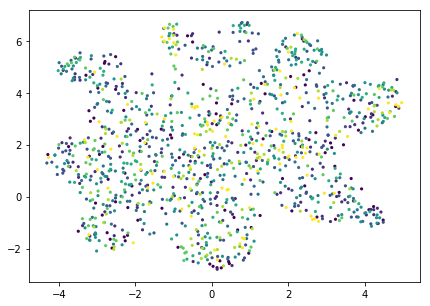

In [34]:
import umap

X_topics = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = year,
s = 10, # size
edgecolor='none'
)
plt.savefig('LSAtopicmodeling', dpi = 200)
plt.show()